<br><br><br><br><br>

# Why Python in HEP?

<br><br><br><br><br>

<br>

<p style="font-size: 1.25em">I could point to its broad adoption as a programming language...</p>

<center><img src="img/pypl-2019.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">But it is more relevant to point to its use in data analysis.</p>

<center><img src="img/python-r-cpp-googletrends-dataset.png" width="75%"></center>

<br>

<center><img src="img/python-r-cpp-googletrends-machinelearning.png" width="75%"></center>

<br>

<br>

<p style="font-size: 1.25em">It's hard to overstate the scale of these communities.</p>

<center><img src="img/root-spark-pandas-google-trends.png" width="75%"></center>

<br>

<p style="font-size: 1.1em">There is value in adopting popular tools: every question/error message is googlable...</p>

<br>

<p style="font-size: 1.25em">Python is widespread in astronomy: LIGO analysis publicly shared in Jupyter...</p>

<table width="100%"><tr style="background: white"><td><img src="img/mentions-of-programming-languages.png" width="100%"></td><td><img src="img/ligo-notebook.png" width="100%"></td></tr></table>

<p style="font-size: 1.25em">And it is the language of choice for some—but not all—LHC experiments.</p>

<center><img src="img/github-cmssw-lin.png" width="70%"></center>

<center><img src="img/github-alice-lin.png" width="70%"></center>

<p style="font-size: 1.25em">(Can't measure ATLAS and LHCb because of private repos on GitLab.)</p>

<br>

<img src="img/commute-by-plane.png" width="65%"> _(Stolen from Jake Vanderplas.)_

<br>

<br><br>

<p style="font-size: 1.25em; font-weight: bold">Drive to the airport, then take a plane:</p>

   * Not everything needs to be fast, only the part that scales with the number of events (or other large number, like number of histogram bins or MC toys). Most analysis code is bookkeeping.
   * Need to step up from interactive tinkering to full-scale analysis __*in small steps*__. Rewriting (and debugging) for speed considered harmful.

<br><br>

In [1]:
# Example: code to compute a fractal (calendar/mousepad/T-shirt...).
import time, numpy

def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_python(800, 1200)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (800 * 1200)))

11524.2138504982 ns per pixel


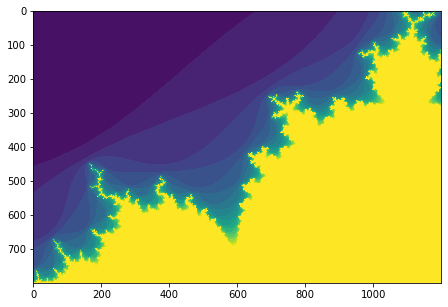

In [2]:
# Pretty, isn't it?

%matplotlib inline
import matplotlib.pyplot
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 5)); ax.imshow(fractal);

In [3]:
# REMINDER: the original code...


def run_python(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)



    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal





In [4]:
# 100× faster...
import numba

def run_numba(height, width, maxiterations=20):
    y, x = numpy.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = numpy.full(c.shape, maxiterations, dtype=numpy.int32)
    return tight_loop(height, width, maxiterations, c, fractal)
@numba.jit
def tight_loop(height, width, maxiterations, c, fractal):
    for h in range(height):
        for w in range(width):               # for each pixel (h, w)...
            z = c[h, w]
            for i in range(maxiterations):   # iterate at most 20 times
                z = z**2 + c[h, w]           # applying z → z² + c
                if abs(z) > 2:               # if it diverges (|z| > 2)
                    fractal[h, w] = i        # color with the iteration number
                    break                    # we're done, no need to keep iterating
    return fractal

starttime = time.time()
fractal = run_numba(3200, 4800)
print("{0} ns per pixel".format(1e9 * (time.time() - starttime) / (3200 * 4800)))

125.85092335939407 ns per pixel


<br><br>

<p style="font-size: 1.25em">The "catch" is that code in the loop must be purely numerical: arrays and basic number types.</p>

<br>

<p style="font-size: 1.25em">It is semantically equivalent to C code and the <tt>@numba.jit</tt> compiles it.</p>

<br>

<p style="font-size: 1.25em">So... why not just write C code? If you developed your analysis in interactive Python, in a notebook or command prompt, it's easier (less buggy) to exorcise a few non-numerical structures than translate everything to C or C++.</p>

<br>

<br><br>

<p style="font-size: 1.25em"><b>Drive/bike/skateboard on your daily commute:</b> do exploration and problem-solving in Python because it has simple data structures, doesn't seg-fault, and dumps stack traces...</p>

<br>

<p style="font-size: 1.25em"><b>Fly to Europe:</b> hyper-optimize the loop that scales with big numbers so that you can finish analyzing your 100 TB this year...</p>

<br>

<p style="font-size: 1.25em; text-align: right; margin-right: 10%">... by replacing critical code <i><b>in small steps</b></i>.</p>

<p style="font-size: 1.25em">Rewriting the loop in C++ is <i>not</i> the easiest/best way to speed it up. (See <a href="misc-fractal.ipynb">misc-fractal.ipynb</a>.)</p>

| Method                                     | time (ns/px) | speedup |
|:-------------------------------------------|-------------:|--------:|
| Pure Python                                        | 12000   |    1× |
| Vectorized Numpy                                   |   368   |   30× |
| Vectorized CuPy (run on GPU)                       |    81   |  150× |
| Compiled by Numba                                  |   136   |   90× |
| Compiled & parallelized by Numba                   |    45   |  250× |
| Compiled & run on GPU by Numba                     |     7.8 | 1500× |
| Parallelized by Dask                               |   238   |   50× |
| Parallelized by Dask, compiled by Numba            |    48   |  250× |
| Partially rewritten in Cython (Python/C++ hybrid)  |  1485   |    8× |
| Completely rewritten in Cython (pure C++)          |    99   |  120× |
| Completely rewritten in pybind11 (pure C++)        |    98   |  120× |
| Completely rewritten in ROOT (pure C++ with `-O0`) |   379   |   32× |

<br>

<center><img src="img/numpy-logo.png" width="35%"></center>

<br>

<p style="font-size: 1.25em">Numpy is the common (in-memory) data format for scientific Python.</p>

<br>

<p style="font-size: 1.25em">Nearly every package can input/output data as Numpy arrays.</p>

<br>

<p style="font-size: 1.25em">Numpy also has a suite of functions for doing calculations a whole array at a time: vectorized in the sense of a <b>S</b>ingle (Python) <b>I</b>nstruction on <b>M</b>ultiple <b>D</b>ata.</p>

In [6]:
# Numpy arrays of physics data:
import uproot
arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")

print("Names of arrays in this dict:")
print(list(arrays))

# Take arrays out of the dict and make each one a variable.
for n in arrays:
    exec(f"{n} = arrays['{n}']")

# Example array: energy of first muon in each event
E1

Names of arrays in this dict:
['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M']


array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [7]:
# Compute pT of all muon pairs:

import numpy

pt = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2)
pt

array([ 7.17219282,  6.13819068,  5.81117254, ..., 43.50036668,
       44.28500082, 44.19520441])

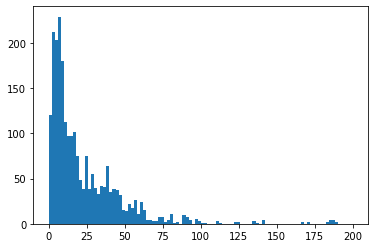

In [8]:
# And __LOOK__:

matplotlib.pyplot.hist(pt, bins=100, range=(0, 200));

In [9]:
# Compute p of all muon pairs:

p = numpy.sqrt(pt**2 + (pz1 + pz2)**2)
p

array([116.61271581, 117.90010197, 117.36645448, ..., 230.90205217,
       232.63405045, 232.88789491])

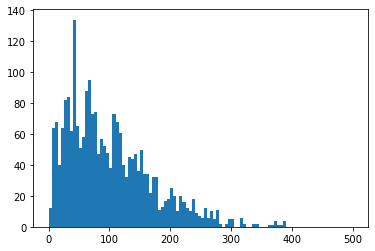

In [10]:
# And __LOOK__:

matplotlib.pyplot.hist(p, bins=100, range=(0, 500));

In [11]:
# Compute mass of all muon pairs:

mass = numpy.sqrt((E1 + E2)**2 - p**2)
mass

array([82.46269156, 83.62620401, 83.30846467, ..., 95.96547966,
       96.49594382, 96.65672765])

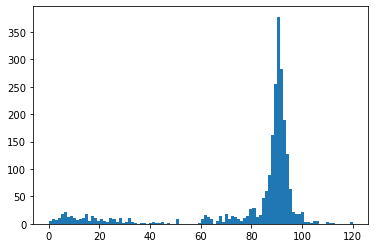

In [12]:
# And __LOOK__:

matplotlib.pyplot.hist(mass, bins=100, range=(0, 120));

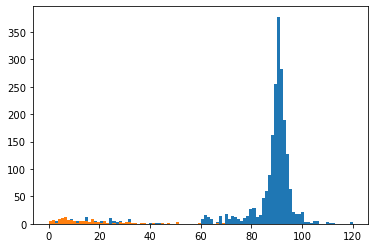

In [13]:
# Start adding cuts, exploring different regions, etc.

matplotlib.pyplot.hist(mass[Q1 != Q2], bins=100, range=(0, 120));
matplotlib.pyplot.hist(mass[Q1 == Q2], bins=100, range=(0, 120));

<br><br>

<p style="font-size: 1.25em">This is the point: you calculate <i>one thing</i> and then you <i>LOOK</i> at the result.</p>

<br>

<p style="font-size: 1.25em">Array-at-a-time logic gives you a statistical view of each <i>step</i> in your calculation as you develop it.</p>

Welcome to JupyROOT 6.18/00


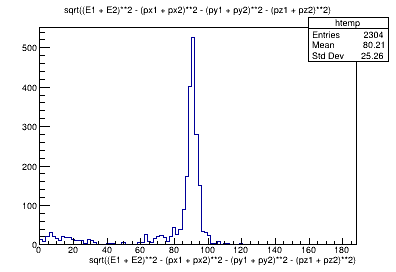

In [14]:
# As physicists, we know this...

import ROOT
canvas = ROOT.TCanvas("canvas", "", 400, 300)
file = ROOT.TFile("data/Zmumu.root")
tree = file.Get("events")
tree.Draw("sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)")
canvas.Draw()

<br><br><br>

<p style="font-size: 1.25em">The hard part is turning those <tt>TTree::Draw</tt> expressions into a full analysis.</p>

<br>

<p style="font-size: 1.25em">How many of you have started with <tt>TTree::Draw</tt> and had to rewrite everything as a C++ loop?</p>

<br>

<p style="font-size: 1.25em">The idea of using Python in for science is to do initial exploration and then scale up "enough" in a single environment.</p>

<br><br><br>